In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV    
import seaborn as sns             
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('seaborn')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\EXL\2021\EQ_2021_Data_Sample (1).csv")

In [3]:
df1=df.pivot_table( index=["countyFIPS"], columns='date', values=['confirmed_cases'])
df1.reset_index(inplace=True)
df1=df1.drop([0], axis=0)
df1.tail()

countyFIPS confirmed_cases                                              \
date                 2020-01-22 2020-01-23 2020-01-24 2020-01-25 2020-01-26   
3140      56037               0          0          0          0          0   
3141      56039               0          0          0          0          0   
3142      56041               0          0          0          0          0   
3143      56043               0          0          0          0          0   
3144      56045               0          0          0          0          0   

                                                  ...                        \
date 2020-01-27 2020-01-28 2020-01-29 2020-01-30  ... 2021-01-21 2021-01-22   
3140          0          0          0          0  ...       3370       3384   
3141          0          0          0          0  ...       2847       2870   
3142          0          0          0          0  ...       1874       1887   
3143          0          0          0          0  ...        848        853   
3144          0          0          0          0  ...        609        609   

                                                                        \
date 2021-01-23 2021-01-24 2021-01-25 2021-01-26 2021-01-27 2021-01-28   
3140       3384       3411       3418       3421       3428       3440   
3141       2870       2931       2981       2993       3020       3028   
3142       1887       1900       1913       1925       1948       1957   
3143        853        858        861        863        864        864   
3144        609        609        609        609        610        610   

                            
date 2021-01-29 2021-01-30  
3140       3464       3472  
3141       3078       3078  
3142       1959       1960  
3143        864        864  
3144        610        610  

[5 rows x 376 columns]

In [1]:
df1.head()

NameError: name 'df1' is not defined

In [4]:
n_dates=df['date'].nunique()
n_counties=df1.shape[0]

y=np.array([ i for i in range(n_dates)]).reshape(-1,1)

In [ ]:
index=df1.index
county_ls=df1['countyFIPS']
cases=[]
for county,idx  in zip( county_ls[:],index[1:]):
    cases_var=[]
    county_df=df1[df1['countyFIPS']==county]
    
    for date in df['date'].unique():
        cases_var.append(county_df["confirmed_cases"][date][idx])
        cases.append(cases_var)
        #print("{} {} {}".format(county, date,county_df["confirmed_cases"][date][i]))
    #plt.plot(y,cases)
    #cases=np.array(cases).reshape(-1,1)
    #y=y.reshape(-1,1)

In [78]:
county_ls.shape

(3144,)

In [12]:
county= df1[df1['countyFIPS']==1011]

In [5]:
cases=[]
#for county,idx  in zip( county_ls[1:],index[1:]):
cases_var=[]
county_ls=df1['countyFIPS']
index=df1.index

for county,idx  in zip( county_ls[310:315],index[310:315]):
    cases_var=[]
    county_df=df1[df1['countyFIPS']==county]

    for date in df['date'].unique():
        cases_var.append(county_df["confirmed_cases"][date][idx])
    cases.append(cases_var)

In [98]:
ala=df1[df1['countyFIPS']==56039]
y=np.array([ i for i in range(len(df['date'].unique()))])   
alacases=[]
for date in df['date'].unique():
    alacases.append(ala["confirmed_cases"][date][3141])

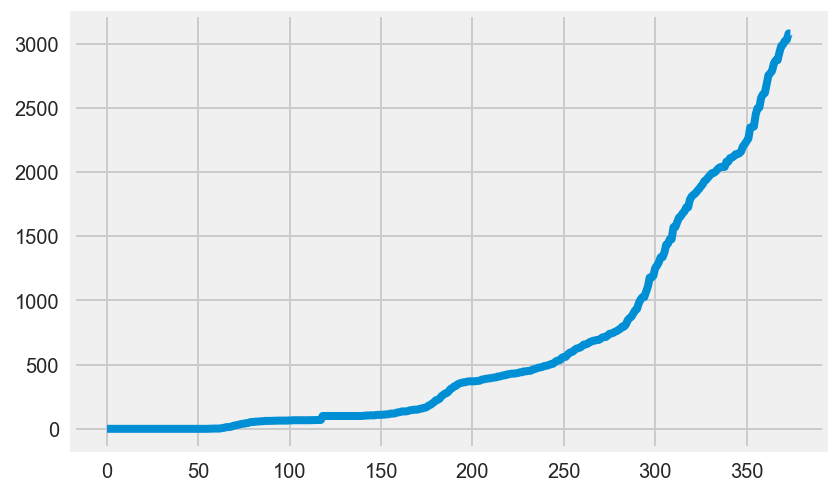

In [99]:
plt.plot(y, alacases)

In [100]:
cases=np.array(cases)
alacases=np.array(alacases).reshape(-1,1)


In [60]:
X=np.array(cases[1]).reshape(-1,1)

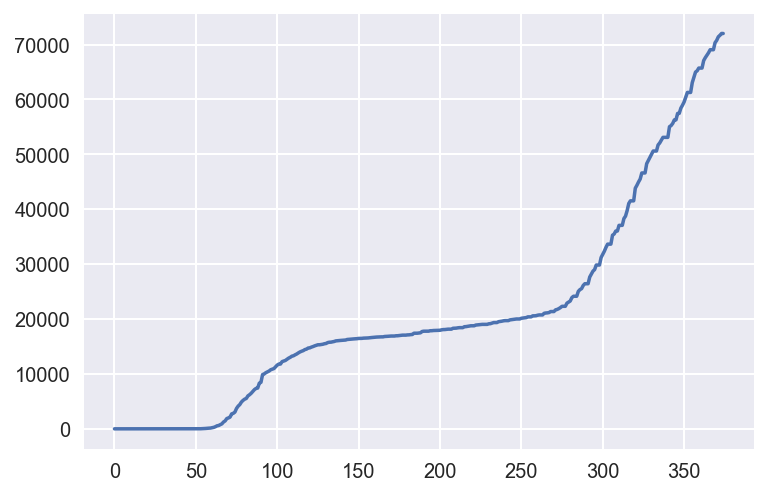

In [40]:
plt.plot(X)
plt.show()

In [11]:
y=y.reshape(-1,1)
y.shape

(375, 1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(y[50:],X[50:], test_size=0.1, shuffle=False, random_state= 42)

In [ ]:
 c = [0.01, 0.1, 1]
 gamma = [0.01, 0.1, 1]
 epsilon = [0.01, 0.1, 1]
 shrinking = [True, False]

 svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

 svm = SVR(kernel='poly', degree=3)
 svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=2)
 svm_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
svm_search.best_params

In [9]:
svm_confirmed = SVR(shrinking=False, kernel='poly',gamma=0.1, epsilon=0.01,degree=3, C=0.01)
svm_confirmed.fit(X_train, y_train)
y_pred=svm_confirmed.predict(X_test)

MAE: 5648.610333068809
MSE: 32053462.111640234


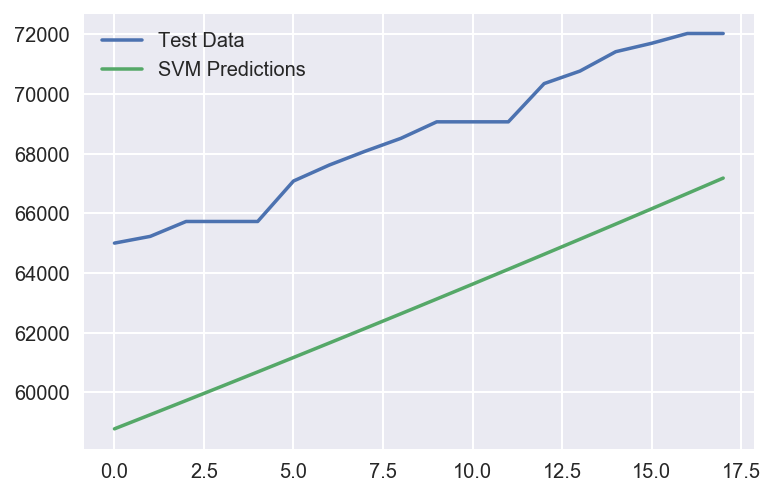

In [10]:
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Test Data', 'SVM Predictions'])

print('MAE:', mean_absolute_error(y_pred, y_test))
print('MSE:',mean_squared_error(y_pred, y_test))

In [62]:
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train)
poly_X_test_confirmed = poly.fit_transform(X_test)
#poly_future_forcast = poly.fit_transform(future)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test)
#bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [63]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
#linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test))
print('MSE:',mean_squared_error(test_linear_pred, y_test))

MAE: 1401.1563433530137
MSE: 2379635.9800528027


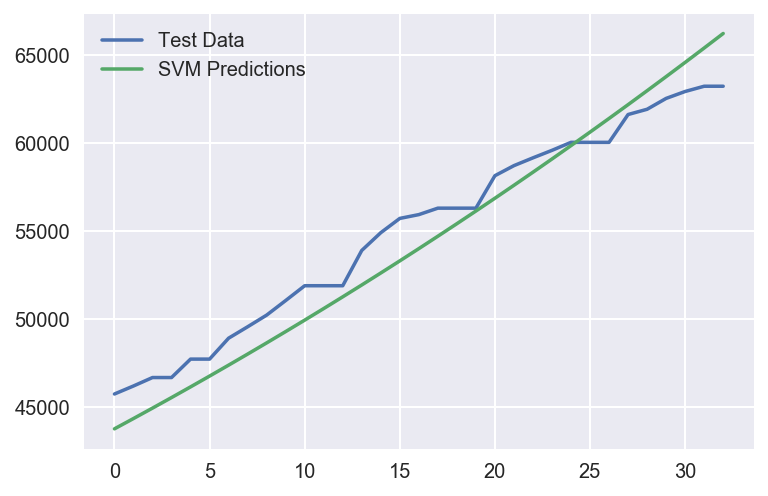

In [64]:
plt.plot(y_test)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'SVM Predictions'])

In [68]:
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.8s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           compute_score=False, copy_X=True,
                                           fit_intercept=False, lambda_1=1e-06,
                                           lambda_2=1e-06, n_iter=300,
                                           normalize=False, tol=0.001,
                                           verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                 

In [69]:
bayesian_search.best_params_


{'tol': 1e-06,
 'normalize': True,
 'lambda_2': 1e-06,
 'lambda_1': 0.001,
 'alpha_2': 1e-07,
 'alpha_1': 1e-05}

In [70]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
#bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test))

MAE: 14153.948179763285
MSE: 261325636.23342878


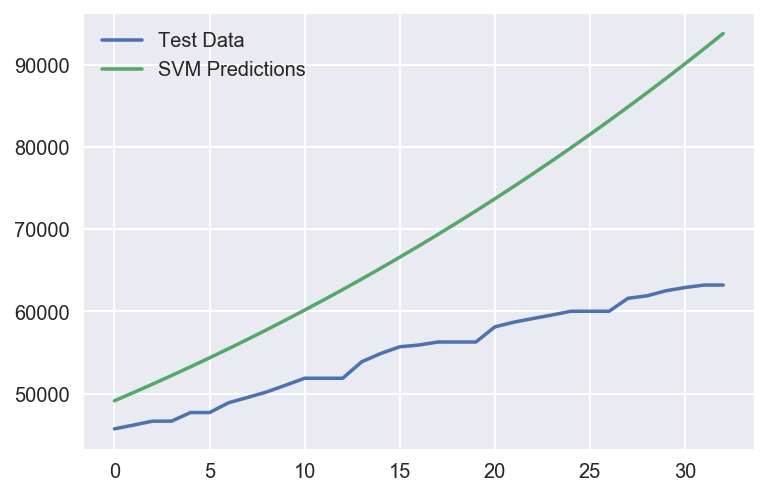

In [71]:
plt.plot(y_test)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'SVM Predictions'])

In [66]:
y_test[22]

array([59147], dtype=int64)

In [65]:
test_linear_pred[22]

array([58332.05359316])

In [87]:
cases=np.array(cases).reshape(1,-1,1)

In [123]:
cases[50:]

array([], shape=(0, 1500, 1), dtype=int64)